# Superficies de los diferentes mapeos




En este notebook se presentan las superficies que resultan de variar el parámetro en los mapeos Hénon y exponencial.

In [9]:
using PyPlot
using TaylorSeries


In [10]:
push!(LOAD_PATH,"/home/evelyn/Documentos/Tesis/Programas/IPM")

4-element Array{Any,1}:
 "/home/evelyn/julia0.6/julia-903644385b/local/share/julia/site/v0.6"
 "/home/evelyn/julia0.6/julia-903644385b/share/julia/site/v0.6"      
 "/home/evelyn/Documentos/Tesis/Programas/IPM"                       
 "/home/evelyn/Documentos/Tesis/Programas/IPM"                       

In [11]:
using ParametrizacionMetodo

## Definimos el mapeo de Hénon

In [12]:
function Henon(x,y,a,b)
   
    x_n = a-b*y-x^2
    y_n = x 

    return [x_n,y_n]
end

Henon (generic function with 1 method)

Definimos una función que calcula el punto fijo que depende del parámetro $a$

In [13]:
function PuntoFijo(a)
    x1 = -1.+(1.+a)^.5
    x2 = -1.-(1.+a)^.5
    return [x2,x2]
end
    

PuntoFijo (generic function with 1 method)

Definimos una función que evalúe los polinomios $P$ que parametrizan a las variedades $W^{s},W^{u}$.

In [14]:
function evaluar(Tiempo, paso, Pol1, Pol2)
    ValX=Float64[]
    ValY=Float64[]

    for t = Tiempo[1]:paso:Tiempo[2]
        
        x = evaluate(Pol1,t)
        y = evaluate(Pol2,t)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    return ValX,ValY
    
end

evaluar (generic function with 1 method)

Se calcularán los polinomios que parametrizan a las variedades para diferentes parámetros con el mismo orden.

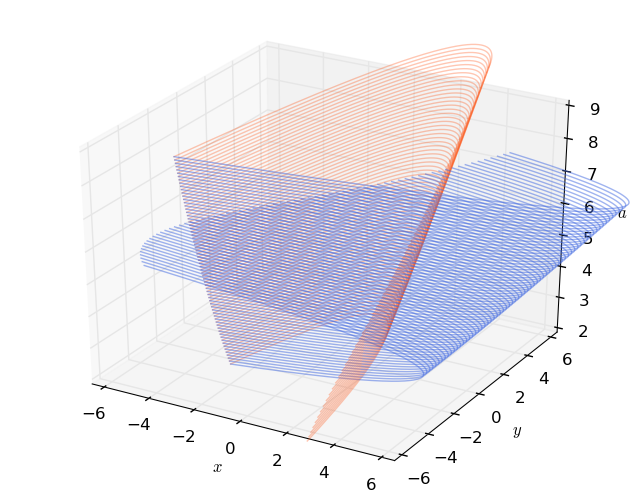

In [15]:
Orden = 10 #Orden de los polinomios
tiempo1 = [0.,60.] #Valor del parámetro para las variedades inestables
tiempo2 = [0.,50.] #Valor del parámetro para las variedades estables
delta_t = 0.125 #paso 
figure(1)
for a in 2.:0.1:8.6  # se varia el parámetro entre 2.0 y 8.6
    henon_p(x,y)=Henon(x,y,a,1.) #se calcula una nueva función en cada iteración que corresponda a cada parámetro
    x_fijo=PuntoFijo(a) #se calcula el punto fijo
    S, Sc, vec_propS, val_propS = Estable(henon_p, Orden , x_fijo, tiempo2, delta_t) # se calcula la variedad estable 
    U, Uf, vec_propU, val_propU = Inestable(henon_p,Orden, x_fijo ,tiempo1, delta_t) # y la inestable
    
    B=evaluar(tiempo2, delta_t, S[1],S[2]) #se evalúan los polinomios
    V=evaluar(tiempo1, delta_t, U[1],U[2]) #se evalúan los polinomios
    
    #pygui(true)
    plot3D(B[2],B[1],a,zdir="z",color="orangered",alpha=0.3)
    plot3D(V[2],V[1],a,zdir="z",color ="royalblue",alpha=0.5)
    xlim(-2*pi,2*pi)
    ylim(-2*pi,2*pi)
    
    xlabel(L"x")
    ylabel(L"y")
    zlabel(L"a")
    
end

## Mapeo exponencial

Definimos el mapeo de Jung

In [16]:
function Jung(x,y,a)
   
    x_n = x+y
    y_n = y+a*x_n*(x_n-1.)*exp(-x_n)

    return [x_n,y_n]
end

Jung (generic function with 1 method)

Generamos las superficies de la misma manera que en el caso del mapeo de Hénon

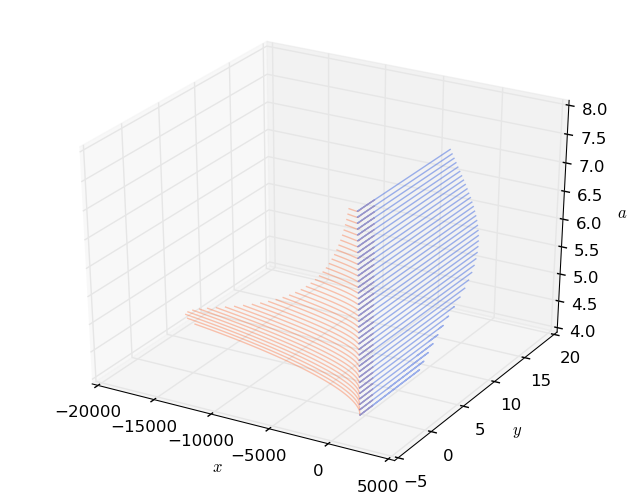

In [19]:
Orden = 10 #Orden de los polinomios
tiempo1 = [0.,10.] #Valor del parámetro para las variedades inestables
tiempo2 = [0.,15.] #Valor del parámetro para las variedades estables
delta_t = 0.125 #paso 
figure(2)
for a in 4.:0.1:7.6  # se varia el parámetro entre 2.0 y 8.6
    jung1(x,y)=Jung(x,y,a) #se calcula una nueva función en cada iteración que corresponda a cada parámetro
    S, Sc, vec_propS, val_propS = Estable(jung1, Orden , [1.,0.], tiempo2, delta_t) # se calcula la variedad estable 
    U, Uf, vec_propU, val_propU = Inestable(jung1, Orden, [1.,0.] ,tiempo1, delta_t) # y la inestable
    
    B=evaluar(tiempo2, delta_t, S[1],S[2]) #se evalúan los polinomios
    V=evaluar(tiempo1, delta_t, U[1],U[2]) #se evalúan los polinomios
    
    #pygui(true)
    plot3D(B[2],B[1],a,zdir="z",color="orangered",alpha=0.3)
    plot3D(V[2],V[1],a,zdir="z",color ="royalblue",alpha=0.5)
    #xlim(-2*pi,2*pi)
    #ylim(-2*pi,2*pi)
    
    xlabel(L"x")
    ylabel(L"y")
    zlabel(L"a")
    
end